<a href="https://colab.research.google.com/github/worklifesg/Time-Series-Forecasting-and-Analysis/blob/main/3.%20General%20Forcasting%20Methods/3_ARIMA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h3> General Forecasting Methods </h3>

<b> Forecasting Procedure: </b> 

 - Choose Model (through statistical analysis)
 - Split data into train and test sets (for fairly evaluate our model)
 - Fit model on training set
 - Evaluate model on test set
 - Refit model on etire dataset
 - Forecast for future dataset

<b> Section Overview: </b> 

 - Forecasting
 - ACF and PACF plots
 - Autoregression - AR
 - Descriptive Statistics and Tests
 - Choosing ARIMA orders
 - ARIMA based models


---



---



#### 3. ARIMA - AutoRegressive Integrated Moving Average

Here we have three components
  - AutoRegressive (AR) - generalization of ARMA model
  - Integrated (I)
  - Moving Average (MA)

a) It works very well with time stamped data but it won't be able to understand any outside factors in forcasting.

b) Both ARIMA and ARMA are fitted to time series data wither to udnerstand the data or to forecast the data

<b> Types of ARIMA models </b>
  - Non-Seasonal ARIMA
  - Seasonal ARIMA (SARIMA)
   - Understanding SARIMA with exogeneous variables such as SARIMAX


---

Data --> Non-stationary, where initial differencing step (corresponding to I part of model) can be applied many times to ELIMINATE non-stationary part.

<b> Non-seasonal ARIMA model</b>

a) Denoted by p,d,q (non-negative integers)
- p = AR :  A regression model that utilizes dependent relationship between current observation and observation over previous period.
- d = I: Differencing of observations in order to make time series stationary.
- d = MA : Model that uses dependency between an observation and residula error from MA applied to lagged observations.

<b> - Stationary means having constant mean and variance over time. \\
  - It means the future predict will also have constant mean and variance. \\
  - Stationary mathematical test: Augmented Dickey-Fuller Test</b>

b) Differencing : shifting the data by 1,2.... named as First Difference, Second Difference....each differencing comes with the cost of losing raw data.
  - For seasonald ata we can do differencing by season as well.
  - Another technique is to combine both methods, taking seasonal difference of the first difference.

<b> How to choose p,d,q</b>

  - Method 1 : ACF, PACF plots. Using these plots we can choose p, d, q on viewing the decay n the plot. (Difficult to read the best value)
  - Method 2 : 
    - Grid Search
    - Run ARIMA based models on different combinations of p,d,q and compare models for on some evaluation metric


---



<b> AR Models </b>

If we drop I and MA components we can get model based only on AR.

<b> <i> AR Model --> </i> </b> Forecast using linear combination of past values of the variable. AR describes the regression of the variable against itself. AR is rum against a set of lagged values of <b> p </b>

AR model specifies that <b> output variable </b> depends linearly on its own previous values and on <b> stochastic term </b>

<u> <b> Formula of AR </b> </u>

\begin{align*}
y_t &=c+\phi_1 y_{t-1} + \phi_2 y_{t-2}+....\phi_p y_{t-p}+\epsilon_t
\end{align*}

 - $y_t$ at time point $t$ is the singular predicted value at time $t$
 - $\phi_1 y_{t-1} + \phi_2 y_{t-2}+....\phi_p y_{t-p}$ are historical values at different point of time.
 - $\phi_p$ are lag coefficients as each coefficient is lagged by one time step backwards
 - $c,\epsilon_t$ are constant and noise respectively - some proportion of this that we can't say or predict that we can't model

<u> <b> Orders of AR </b> </u>

AR (1) ---> AR model or order 1 (predict $y_t$ just one lag time backwards)

\begin{align*}
y_t &=c+\phi_1 y_{t-1} + \epsilon_t
\end{align*}

AR (2) ---> AR model or order 2 (predict $y_t$ just two lag time backwards)

\begin{align*}
y_t &=c+\phi_1 y_{t-1}+ \phi_2 y_{t-2} + \epsilon_t
\end{align*}

* More higher order, more accurate results are going to be because of using more historical data but there is a limit as well as if we go back too far it may pick up noise that is not relevant to prediction term.
* Statsmodels can choose best model order for us.

#### AR Models with Statsmodels

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from statsmodels.tsa.ar_model import AR, ARResults

In [2]:
df = pd.read_csv('uspopulation.csv',index_col='DATE',parse_dates=True)
df.index.freq='MS'
df.head()

,PopEst
DATE,
2011-01-01,311037
2011-02-01,311189
2011-03-01,311351
2011-04-01,311522
2011-05-01,311699


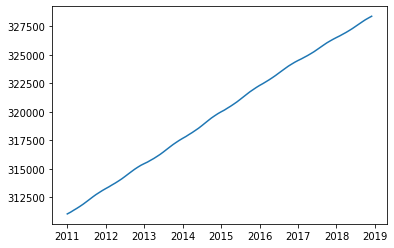

In [3]:
plt.plot(df['PopEst']) #minute seasonality, AR can fit this data quite well.

In [4]:
len(df)

96

So we have 96 months, taking one year off as test data if ok as we will have 84 months to train

In [5]:
train = df.iloc[:84]
test = df.iloc[84:]

In [6]:
import warnings
warnings.filterwarnings('ignore')

In [7]:
# AR(1) model

model = AR(train['PopEst'])

AR1fit = model.fit(maxlag=1)

In [8]:
AR1fit.aic #information criteria

6.410771237032229

In [9]:
AR1fit.k_ar #order of AR

1

In [10]:
AR1fit.params #gives constant value and lag coefficients phi1

const        284.913797
L1.PopEst      0.999686
dtype: float64

So general forecasting process

In [11]:
start = len(train)
end = len(train) + len(test) -1
print('Start: ', start)
print('End: ', end)

Start:  84
End:  95


In [12]:
AR1fit.predict(start=start,end=end,dynamic=False)

2018-01-01    326560.403377
2018-02-01    326742.749463
2018-03-01    326925.038278
2018-04-01    327107.269838
2018-05-01    327289.444162
2018-06-01    327471.561268
2018-07-01    327653.621173
2018-08-01    327835.623896
2018-09-01    328017.569455
2018-10-01    328199.457868
2018-11-01    328381.289152
2018-12-01    328563.063326
Freq: MS, dtype: float64

In [13]:
predictions1 = AR1fit.predict(start=start,end=end,dynamic=False)
predictions1 = predictions1.rename('AR(1) Prediction')

In [14]:
predictions1

2018-01-01    326560.403377
2018-02-01    326742.749463
2018-03-01    326925.038278
2018-04-01    327107.269838
2018-05-01    327289.444162
2018-06-01    327471.561268
2018-07-01    327653.621173
2018-08-01    327835.623896
2018-09-01    328017.569455
2018-10-01    328199.457868
2018-11-01    328381.289152
2018-12-01    328563.063326
Freq: MS, Name: AR(1) Prediction, dtype: float64

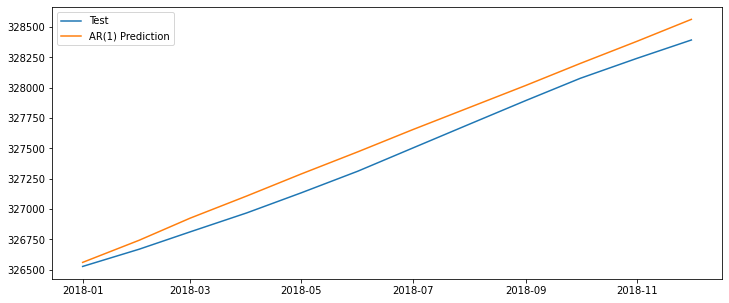

In [17]:
plt.figure(figsize=(12,5))
plt.plot(test,label='Test')
plt.plot(predictions1,label='AR(1) Prediction')
plt.legend()

So here we see the test data is not predicted well as it is only order 1

const        137.368305
L1.PopEst      1.853490
L2.PopEst     -0.853836
dtype: float64


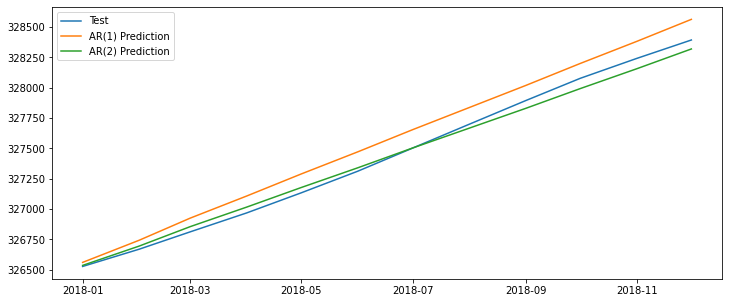

In [18]:
AR2fit = model.fit(maxlag=2)
predictions2 = AR2fit.predict(start=start,end=end,dynamic=False)
predictions2 = predictions2.rename('AR(2) Prediction')

print(AR2fit.params)

plt.figure(figsize=(12,5))
plt.plot(test,label='Test');
plt.plot(predictions1,label='AR(1) Prediction');
plt.plot(predictions2,label='AR(2) Prediction');
plt.legend()

Now, much closer to test values 

We can use statsmodels to find correct order no.

In [19]:
ARfit = model.fit(ic='t-stat') #if maxlag is None, statsmodels will figure out which order is good fit and we define ic - criteria for optimum lag length

ARfit.params
#statsmodel decided maxlag is 8

const        82.309677
L1.PopEst     2.437997
L2.PopEst    -2.302100
L3.PopEst     1.565427
L4.PopEst    -1.431211
L5.PopEst     1.125022
L6.PopEst    -0.919494
L7.PopEst     0.963694
L8.PopEst    -0.439511
dtype: float64

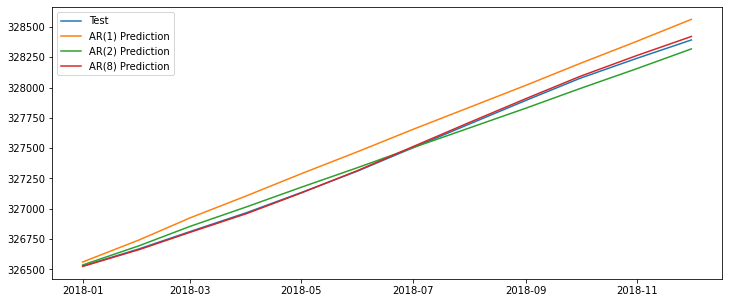

In [20]:
predictions8 = ARfit.predict(start=start,end=end,dynamic=False)
predictions8 = predictions8.rename('AR(8) Prediction')

plt.figure(figsize=(12,5))
plt.plot(test,label='Test');
plt.plot(predictions1,label='AR(1) Prediction');
plt.plot(predictions2,label='AR(2) Prediction');
plt.plot(predictions8,label='AR(8) Prediction');
plt.legend()

In [21]:
from sklearn.metrics import mean_squared_error

labels = ['AR1','AR2','AR3']
preds = [predictions1,predictions2,predictions8]

for i in range(3):
  error = mean_squared_error(test['PopEst'],preds[i])
  print(f'{labels[i]} MSE was : {error}')

AR1 MSE was : 17449.71423587912
AR2 MSE was : 2713.2585540102214
AR3 MSE was : 186.97053754548145


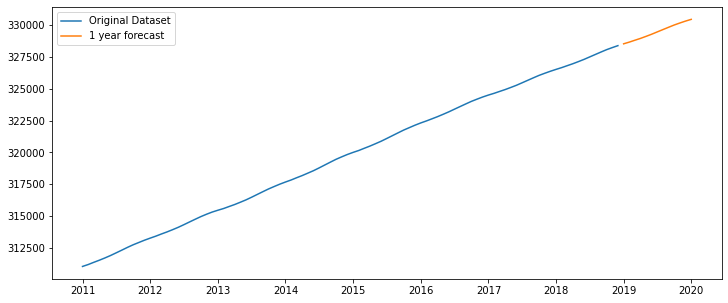

In [22]:
#forecast on future data

model = AR(df['PopEst']) #train again on whole data
ARfit_future = model.fit()

forecasted_values = ARfit_future.predict(start=len(df),end=len(df)+12).rename('Forcast') #forecasting a year 

plt.figure(figsize=(12,5))
plt.plot(df['PopEst'],label='Original Dataset');
plt.plot(forecasted_values,label='1 year forecast');
plt.legend()